In [35]:
# print out different package versions
import sys
print("Python version: {}".format(sys.version))
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))
from pandas import Series, DataFrame

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

Python version: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.20.3
matplotlib version: 2.1.0
NumPy version: 1.13.3
SciPy version: 0.19.1
IPython version: 6.1.0
scikit-learn version: 0.19.1


In [27]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [52]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
train_df.info()
print ('-' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [55]:
# showing dataset attributes
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# object type columns 
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beane, Mr. Edward",male,347082,B96 B98,S
freq,1,577,7,4,644


In [19]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [56]:
# Data processing to convert to correct data type in the dataframe
# Drop any unneccessary columns, these columns won't be useful in analysis and prediction
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name','Ticket'], axis=1)

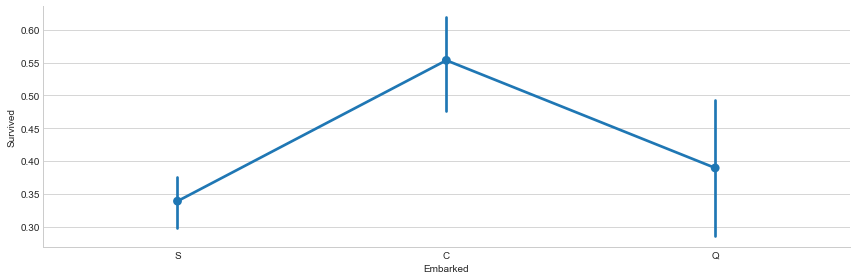

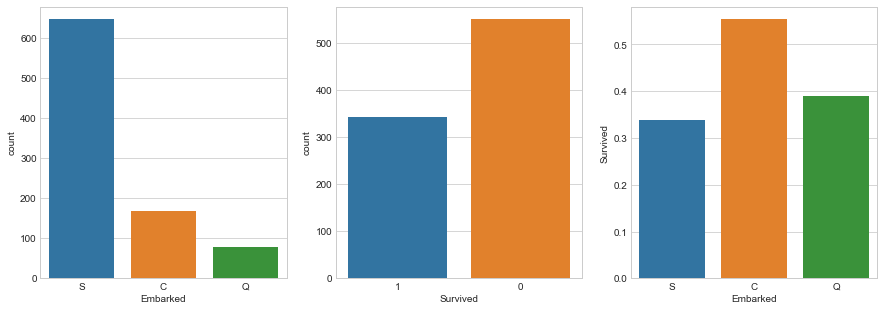

In [57]:
# Embarked

# in train_df, fill in the two missing values with the most occured one, which is "S"
train_df["Embarked"] = train_df["Embarked"].fillna("S")

# plot
sns.factorplot('Embarked', 'Survived', data=train_df, size=4, aspect=3)
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', data=train_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survivied passengers for each value in Embarked
embark_perc = train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S','C','Q'], ax=axis3)

# From the graph, embarked doesn't seem to be any useful for predicting the survival of a person. Drop it in the df
train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

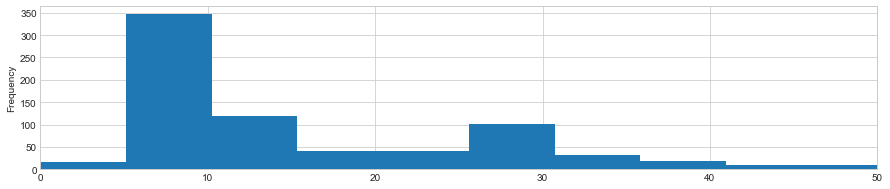

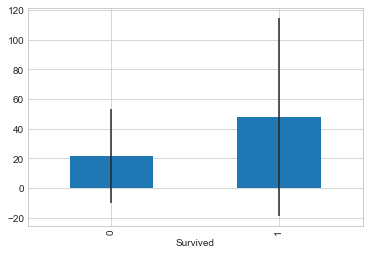

In [58]:
# Fare

# Only for test df since there's missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
train_df['Fare'] = train_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

# get fare from survived & didn't survive passengers
fare_not_survived = train_df["Fare"][train_df["Survived"] == 0]
fare_survived = train_df["Fare"][train_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
train_df['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 50))

average_fare.index.names = std_fare.index.names = ["Survived"]
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


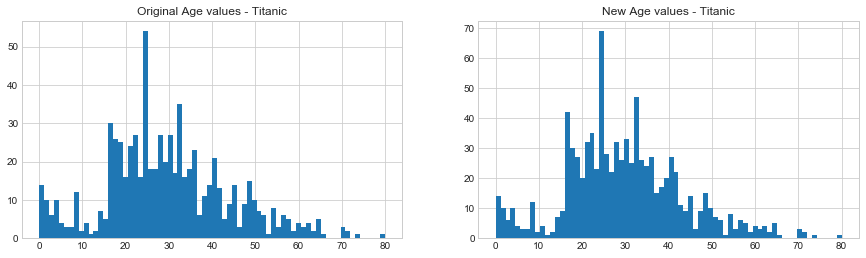

In [59]:
# Age

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in train_df
average_age_titanic = train_df["Age"].mean()
std_age_titanic = train_df["Age"].std()
count_nan_age_titanic = train_df["Age"].isnull().sum()

# get average, std, and number of NaN values in train_df
average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size=count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size=count_nan_age_test)

# plot original age values
# drop null values and convert to int
train_df["Age"].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in age column with random value generated
train_df["Age"][np.isnan(train_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
train_df["Age"] = train_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)

# plot new age values
train_df["Age"].hist(bins=70, ax=axis2)

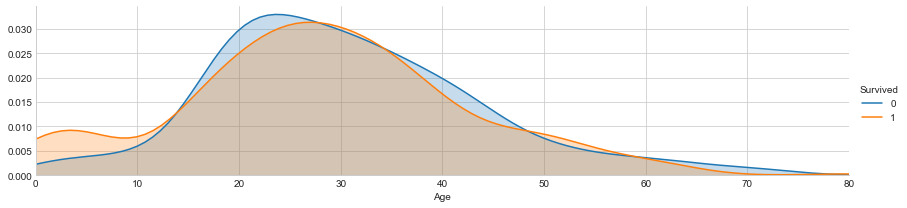

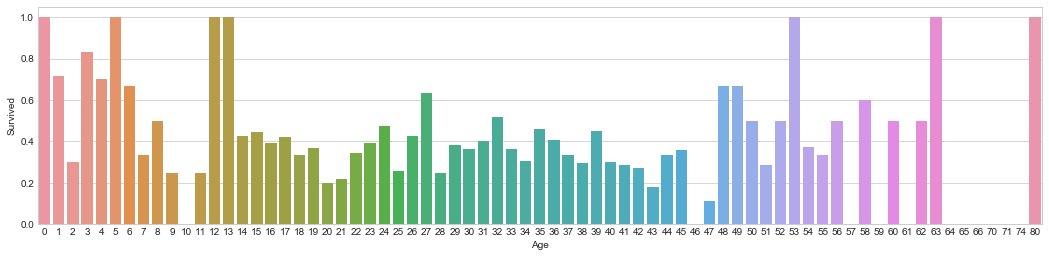

In [60]:
# continue with plot age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train_df["Age"].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))
average_age = train_df[["Age", "Survived"]].groupby(["Age"], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [61]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction

train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0,0,'With Family'), Text(0,0,'Alone')]

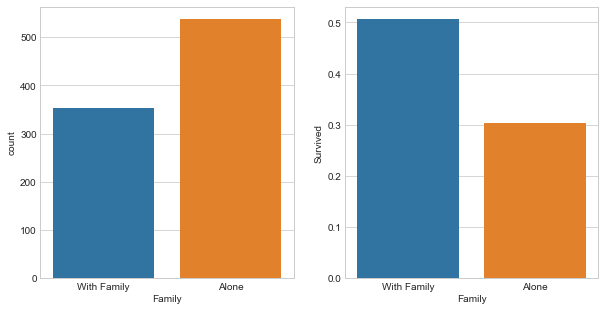

In [62]:
# Family

# Instead of having two columns for parch (number of parent/children aboard the Titanic ) and SibSp
# we will just have one column indicating whether the passenger has family member aboard

train_df['Family'] = train_df['Parch'] + train_df['SibSp']
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] = test_df['Parch'] + test_df['SibSp']
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop parch and sibsp column
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

# plot
fig, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

sns.countplot(x='Family', data=train_df, order=[1, 0], ax=axis1)

# average of survived for those whoe had/didn't have any family member
family_perc = train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1, 0], ax=axis2)

axis1.set_xticklabels(["With Family", "Alone"], rotation=0)

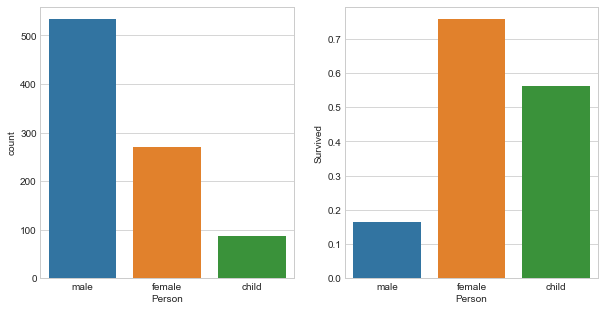

In [63]:
# Sex

# children (age < 16) on aboard seem to have a high chances for survival
# so, we can classify passengers as males, females and child

def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

train_df['Person'] = train_df[['Age','Sex']].apply(get_person, axis=1)
test_df['Person'] = test_df[['Age','Sex']].apply(get_person, axis=1)

# No need to use Sex column since we created person column
train_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(train_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train_df = train_df.join(person_dummies_titanic)
test_df = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

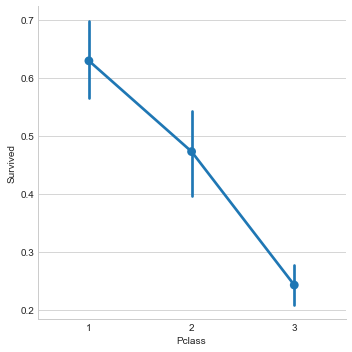

In [64]:
# Pclass

sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(train_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

train_df = train_df.join(pclass_dummies_titanic)
test_df = test_df.join(pclass_dummies_test)

In [65]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [66]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.80808080808080807

In [67]:
# Support Vector Machine
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, Y_train)

0.86756453423120095

In [68]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.95622895622895621

In [69]:
# K Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn.score(X_train, Y_train)

0.82267115600448937

In [70]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
gaussian.score(X_train, Y_train)

0.76655443322109984

In [71]:
# get correlation coefficient for each feature using logistic regression
coeff_df = DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

coeff_df

,Features,Coefficient Estimate
0,Age,-0.029765
1,Fare,0.001640
2,Family,-0.216040
3,Child,1.649344
4,Female,2.759764
5,Class_1,2.118891
6,Class_2,1.071286


In [ ]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived" : Y_pred
})
submission.to_